In [171]:
# we will start with the import of important libraries for our model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

In [173]:
# We are using set_option function under Pandas so that we can all the variables together for better understanding
pd.set_option('display.max_columns', None)


In [174]:
# Reading the data
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Now we will look at the general information of the DataFrame

In [175]:
data.shape

(9240, 37)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [177]:
# Here we can see that the average number of visits on the website is around 3 and Total Time Spent on Website is 487 seconds.
# We will further analyse these variables for better understanding.
var = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
data[var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


# Exploratory Data Analysis
## 1. Data Cleaning
### A. Fixing MIssing values

In [178]:
# As we can see that we have missing values in very high proportion and we do not have a very large dataset. So we cannot just simply drop these datapoints. We will need to deal with them accordingly. 
data.isna().sum()/len(data)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [179]:
# First we will look at some of the varaibles with high missing values and we are keeping the threshold of 30%
missing_values = 100*data.isnull().mean() 
missing_values = missing_values[missing_values>= 30].sort_values(ascending=False) 
missing_values

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
Tags                           36.287879
dtype: float64

In [180]:
# As these variables have some very important data points like "High in Relevance", we can not just simply remove the entire column. We will impute the missing values with a string value.
data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [181]:
data['Lead Quality']=data['Lead Quality'].fillna("Dont know")

In [182]:
# As we can see that Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score have same missing values, we can say that these variables are very correlated to each other.
# So we have decided to remove three of them and impute the missing values in the one of them.
# And we will convert the values of "Asymmetrique Activity Index" into integer value for analyzation.
data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [183]:
data=data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [184]:
data['Asymmetrique Activity Index']=data['Asymmetrique Activity Index'].apply(lambda
            x:1 if x=='01.High' else 2 if x=='02.Medium' else 3)

In [185]:
data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
3    4580
2    3839
1     821
Name: count, dtype: int64

In [186]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [187]:
data['What is your current occupation']=data['What is your current occupation'].fillna('Unknown')

In [188]:
# We have some variables with value "select" which means that user has not provided the details. We will convert them as missing values and later impute them.
data.loc[data['How did you hear about X Education']=='Select','How did you hear about X Education']=np.nan
data.loc[data['Specialization']=='Select','Specialization']=np.nan
data.loc[data['City']=='Select','City']=np.nan
data.loc[data['Lead Profile']=='Select','Lead Profile']=np.nan


In [189]:
# Here we are looking at the variables having missing values more than 15% of shape.
cols = (data.isnull().sum()/data.shape[0])*100 
cols = cols[cols>= 15] 
cols

Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     74.188312
City                                             39.707792
dtype: float64

In [190]:
cols=cols.index.tolist()

In [191]:
# Here we are defining a custom variable to convert all the missing values to a common string value so that we do not have to remove these variables.
for i in cols:
    data[i]=data[i].fillna('Unknown')

In [194]:
data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [195]:
# Now we can remove all of the rows having missing values as the number of rows is very small and it will not affect our overall analysis.

data=data.dropna()

In [196]:
data["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

In [197]:
# Here we are changing the time given in seconds to minutes for better understanding.
data["Total Minutes Spent on Website"] = data["Total Time Spent on Website"].apply(lambda x: round(float(x/60), 2))
data.drop(["Total Time Spent on Website","Prospect ID","Lead Number"], axis = 1, inplace = True)

### Univaraite Analysis

In [198]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
0,API,Olark Chat,No,No,0,0.0,0.0,Page Visited on Website,Unknown,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Unknown,Unknown,2,No,No,Modified,0.00
1,API,Organic Search,No,No,0,5.0,2.5,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Dont know,No,No,Unknown,Unknown,2,No,No,Email Opened,11.23
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,2.0,Email Opened,India,Business Administration,Unknown,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2,No,Yes,Email Opened,25.53
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Unknown,Mumbai,2,No,No,Modified,5.08
4,Landing Page Submission,Google,No,No,1,2.0,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Unknown,Mumbai,2,No,No,Modified,23.80


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Country                                        9074 non-null   object 
 9   Specialization                                 9074 non-n

<Axes: ylabel='count'>

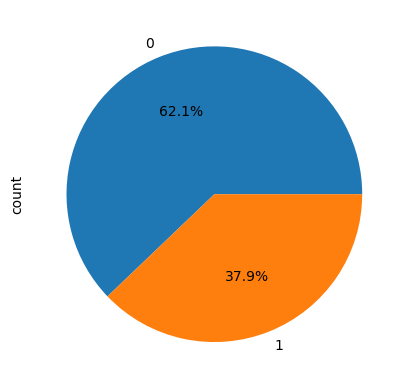

In [200]:
# As we can see here that the number of leads converted is lesser than the those who did not convert. We will check multiple variables in the univariate and bivariate analysis to increase the proportion of converted leads.
data.Converted.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Lead Origin'>

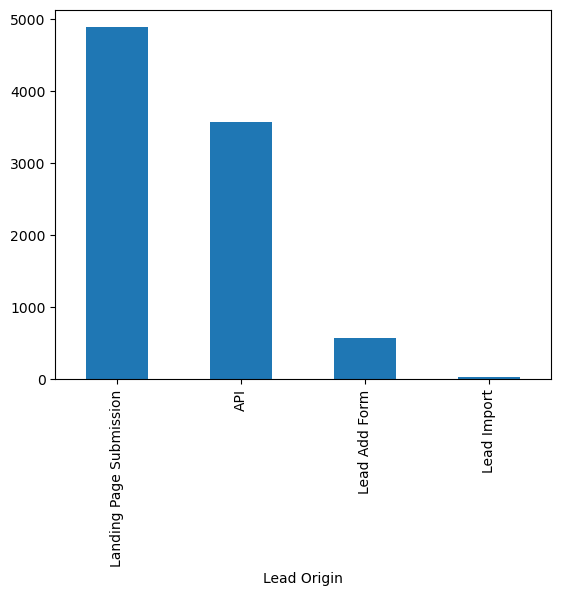

In [201]:
# As we can see from this graph, it is clear that organisation need to work upon it "Lead add forms" and "Lead import" way in ordert o improve the number of leads generation.
data["Lead Origin"].value_counts().plot.bar()

<Axes: ylabel='Lead Source'>

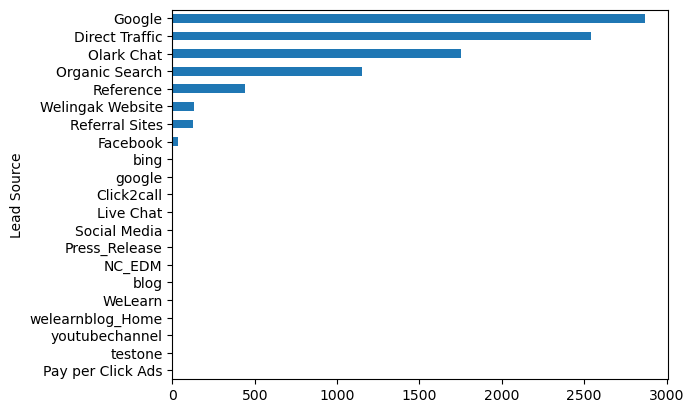

In [202]:
data["Lead Source"].value_counts(ascending = True).plot.barh()

<Axes: xlabel='Country'>

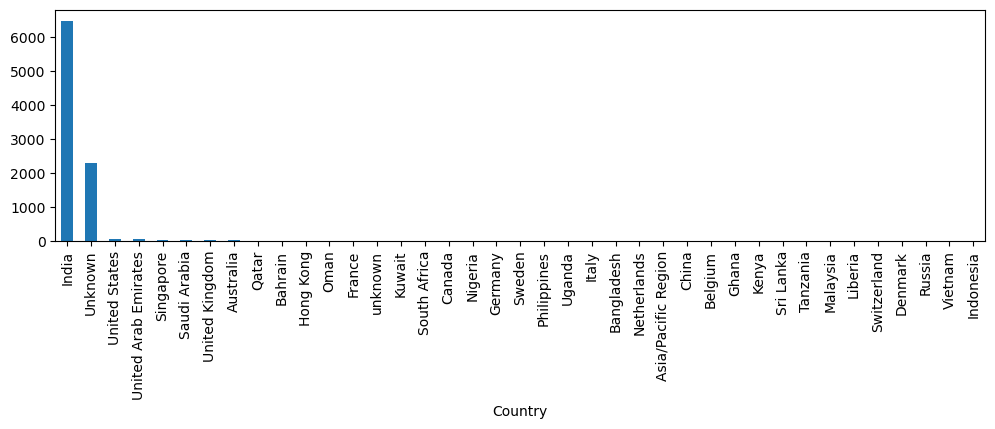

In [203]:
# In order to increse the number of converted leads, the organisation needs to focus more on the Indian population as we can see that a very large proportion of the leads are generate from the India subcontinent.
plt.figure(figsize=[12,3])
data.Country.value_counts(ascending = False).plot.bar()

<Axes: xlabel='Specialization'>

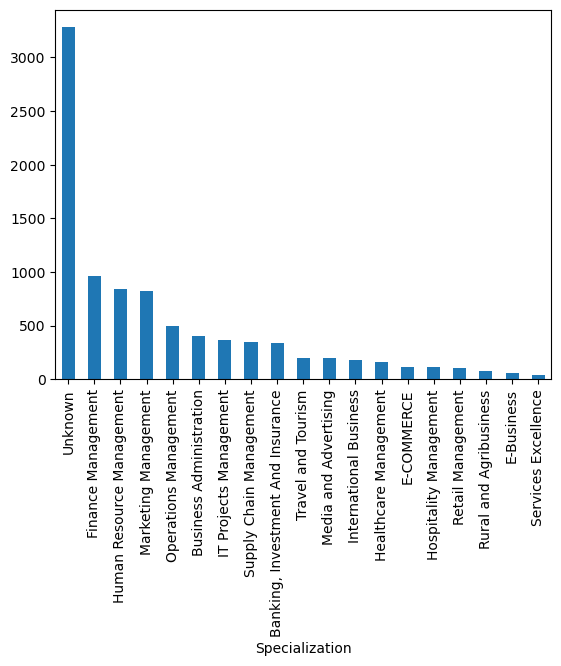

In [204]:
# The organisation needs to first focus upon making people add their specialization in a large number so that we can understand the background of the people.
# If we look at this graph, it is clear that people from Fincane, HRM and marketing are in high numer and spread acoress other categories.
data["Specialization"].value_counts().plot.bar()

<Axes: xlabel='Total Minutes Spent on Website', ylabel='Density'>

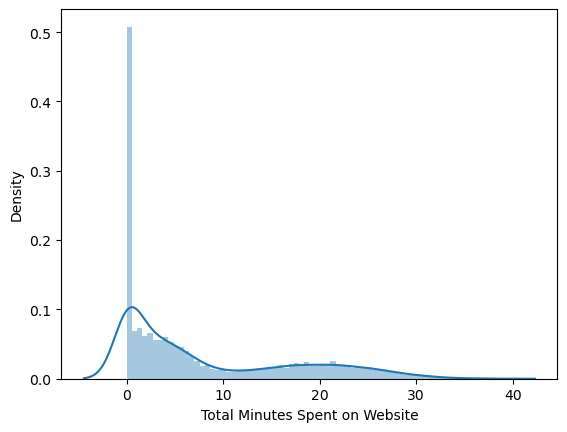

In [206]:
# Any organisation needs to make sure that theri official website has enough stimulus to not only attract the users but also make them spend more time on it.
# But as we can see from this distribution plot, it is clear that most of the user have spent very low amount of time on the website.
sns.distplot(data["Total Minutes Spent on Website"], bins = 70)

# Bivariate Analysis

In [207]:
data["TotalVisits"].value_counts()

TotalVisits
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

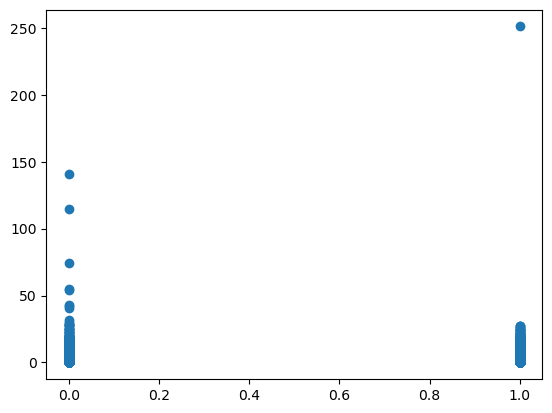

In [208]:
# After looking at both scatterplot and box plot, it is clear that visits on the website do not decide if the leads are going to be converted or not.
# Except few outliers in case of converted, we see that most leads that were not converted visited much more time on the website.
# AS we can see from the above data it is clear that most of the people took the decision in their first 4 visits on the website.
plt.scatter(data["Converted"],data["TotalVisits"])


<Axes: xlabel='Converted', ylabel='TotalVisits'>

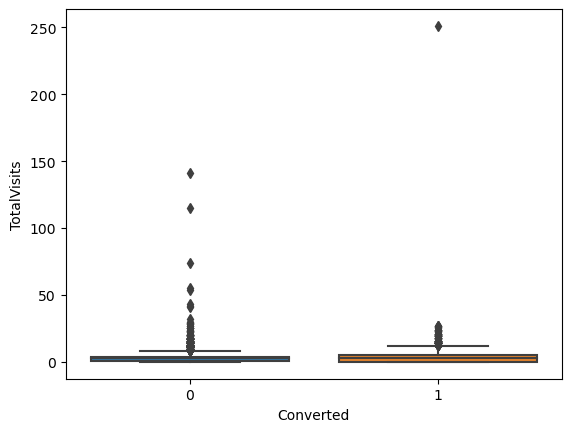

In [209]:
sns.boxplot(x = data["Converted"], y = data["TotalVisits"])

In [210]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
0,API,Olark Chat,No,No,0,0.0,0.0,Page Visited on Website,Unknown,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Unknown,Unknown,2,No,No,Modified,0.00
1,API,Organic Search,No,No,0,5.0,2.5,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Dont know,No,No,Unknown,Unknown,2,No,No,Email Opened,11.23
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,2.0,Email Opened,India,Business Administration,Unknown,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2,No,Yes,Email Opened,25.53
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Unknown,Mumbai,2,No,No,Modified,5.08
4,Landing Page Submission,Google,No,No,1,2.0,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Unknown,Mumbai,2,No,No,Modified,23.80


# Treating Outliers: We need to treat them here because of the bivariate analysis.

In [211]:
var = ["TotalVisits","Total Minutes Spent on Website","Page Views Per Visit"]
data[var].describe()

,TotalVisits,Total Minutes Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,8.048106,2.370151
std,4.858802,9.087628,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,0.180000,1.000000
50%,3.000000,4.100000,2.000000
75%,5.000000,15.377500,3.200000
max,251.000000,37.870000,55.000000


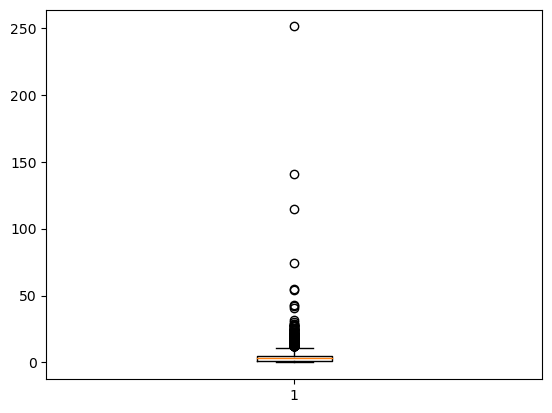

In [212]:
plt.boxplot(data["TotalVisits"])
plt.show()

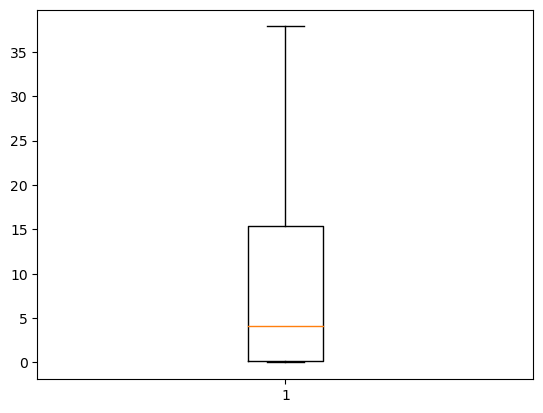

In [213]:
plt.boxplot(data["Total Minutes Spent on Website"])
plt.show()

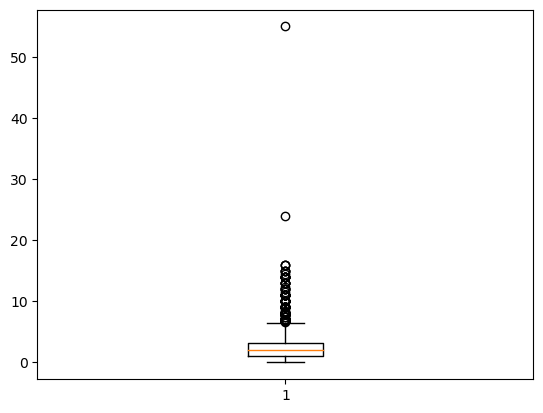

In [214]:
plt.boxplot(data["Page Views Per Visit"])
plt.show()

In [215]:
# AS we can see from the above boxplots, we have outliers in two variables ->>
# 1. Page Views Per Visit
# 2. TotalVisits
# We will treat these variables by removing these outliers as outliers are very few in numbers.
data = data[(data["TotalVisits"]<100) & (data["Page Views Per Visit"]<20)]

Text(0, 0.5, 'Page Views Per Visit')

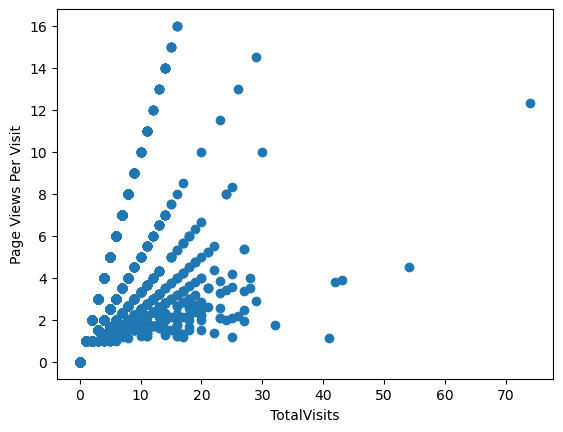

In [216]:
# Here we can see the linear relation between the number of pages view by the user and total visits by the user. As we have already discussed that we need to create more stimulus on our website to attract the user so that we can increase the probability of the number of pages view by users. 
plt.scatter(data["TotalVisits"],data["Page Views Per Visit"])
plt.xlabel("TotalVisits")
plt.ylabel("Page Views Per Visit")


## Fixing the Categorical values

In [217]:
# Now we will convert all the categorical variabels into labels so that we can use them in the following analysis
objectcols=data.loc[:,data.dtypes=='object']
objectcols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [218]:
object_cols=list(objectcols)

In [219]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in object_cols:
    data[i]=label_encoder.fit_transform(data[i])
    

In [220]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
0,0,6,0,0,0,0.0,0.0,10,36,18,8,4,0,0,0,0,0,0,0,0,0,8,2,0,0,5,6,2,0,0,8,0.00
1,0,7,0,0,0,5.0,2.5,5,12,18,8,4,0,0,0,0,0,0,0,0,0,14,0,0,0,5,6,2,0,0,4,11.23
2,1,1,0,0,1,2.0,2.0,5,12,1,8,3,0,0,0,0,0,0,0,0,0,20,3,0,0,3,0,2,0,1,4,25.53
3,1,1,0,0,0,1.0,1.0,13,12,11,9,4,0,0,0,0,0,0,0,0,0,14,4,0,0,5,0,2,0,0,8,5.08
4,1,3,0,0,1,2.0,1.0,1,12,18,4,4,0,0,0,0,0,0,0,0,0,20,3,0,0,5,0,2,0,0,8,23.80


### B. Fixing Rows and Columns

In [221]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
0,0,6,0,0,0,0.0,0.0,10,36,18,8,4,0,0,0,0,0,0,0,0,0,8,2,0,0,5,6,2,0,0,8,0.00
1,0,7,0,0,0,5.0,2.5,5,12,18,8,4,0,0,0,0,0,0,0,0,0,14,0,0,0,5,6,2,0,0,4,11.23
2,1,1,0,0,1,2.0,2.0,5,12,1,8,3,0,0,0,0,0,0,0,0,0,20,3,0,0,3,0,2,0,1,4,25.53
3,1,1,0,0,0,1.0,1.0,13,12,11,9,4,0,0,0,0,0,0,0,0,0,14,4,0,0,5,0,2,0,0,8,5.08
4,1,3,0,0,1,2.0,1.0,1,12,18,4,4,0,0,0,0,0,0,0,0,0,20,3,0,0,5,0,2,0,0,8,23.80


In [222]:
data["TotalVisits"] = data["TotalVisits"].apply(lambda x: int(x))
# Now we need to correct the values of "Page Views Per Visit" variable as we have some values which do not make any business sense like 1.33 or 1.5.
data["Page Views Per Visit"] = data["Page Views Per Visit"].apply(lambda x: int(x))

In [225]:
# # Now we need to convert some cateforical variables from Yes and No to 1 and 0 for further analysis. For that, we will define a custom function
# cat_var = ['Do Not Email','Do Not Call','Search', 'Magazine',
#        'Newspaper Article', 'X Education Forums', 'Newspaper',
#        'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
#           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
# def binary_maping(x):
#     return x.map({'Yes': 1, "No": 0})
# data[cat_var] = data[cat_var].apply(binary_maping)

### Test-Train Split

In [226]:
# Here we will important library for this task.
from sklearn.model_selection import train_test_split

In [227]:
# First we will need to assign the values to X and Y variables
y = data["Converted"]
X = data.drop("Converted", axis = 1)
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
0,0,6,0,0,0,0,10,36,18,8,4,0,0,0,0,0,0,0,0,0,8,2,0,0,5,6,2,0,0,8,0.00
1,0,7,0,0,5,2,5,12,18,8,4,0,0,0,0,0,0,0,0,0,14,0,0,0,5,6,2,0,0,4,11.23
2,1,1,0,0,2,2,5,12,1,8,3,0,0,0,0,0,0,0,0,0,20,3,0,0,3,0,2,0,1,4,25.53
3,1,1,0,0,1,1,13,12,11,9,4,0,0,0,0,0,0,0,0,0,14,4,0,0,5,0,2,0,0,8,5.08
4,1,3,0,0,2,1,1,12,18,4,4,0,0,0,0,0,0,0,0,0,20,3,0,0,5,0,2,0,0,8,23.80


In [228]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [229]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
var = ["TotalVisits","Page Views Per Visit","Total Minutes Spent on Website"]
scaler=  StandardScaler()
X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
391,0,6,0,0,-0.969300,-1.111184,9,36,18,8,4,0,0,0,0,0,0,0,0,0,18,0,0,0,5,6,3,0,0,8,-0.893221
4351,0,6,0,0,-0.969300,-1.111184,5,36,18,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6,3,0,0,4,-0.893221
2661,2,10,0,0,-0.969300,-1.111184,12,36,4,8,6,0,0,0,0,0,0,0,0,0,20,3,0,0,3,6,3,0,0,12,-0.893221
8298,1,1,0,0,-0.687021,-0.629268,1,12,3,8,4,0,0,0,0,0,0,0,0,0,25,0,0,0,5,0,2,0,1,8,0.117334
6514,1,3,1,0,0.159816,0.816478,12,12,12,7,4,0,0,0,0,0,0,0,0,0,14,4,0,0,5,3,3,0,0,12,-0.652352


In [232]:
# Now we will look at the conversion rate
# Right now, we have conversion rate of 38%. We will need to build a predictive model to increase this ratio.?
sum(y_train[y_train == 1])/len(y_train)*100

37.838689350976686

In [233]:
# Now we will look at the correlation between different columns and then target variable
# As we have many variables, first we will check the correlation statistically and then find those variables which have high correlation with the target variable
plt.figure(figsize=[20,10])

corr = data.corr()
# We have identified few of the columns having high correlation with the target variable
corr[corr.Converted>0.15]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
Lead Origin,1.000000,0.010081,0.051286,0.007938,0.209952,0.114182,0.171965,0.048691,-0.123424,-0.499827,-0.176572,-0.035128,-0.221867,0.007105,NaN,0.007938,0.005613,0.005613,0.011227,0.008300,NaN,-0.024472,0.159055,NaN,NaN,-0.169922,-0.515939,0.103002,NaN,0.322450,0.042362,0.074322
Lead Source,0.010081,1.000000,-0.054872,0.011657,0.152664,-0.194867,-0.247145,0.074899,0.532947,0.303910,0.144514,0.044717,-0.015845,-0.009632,NaN,-0.000792,-0.011123,-0.011123,-0.022251,-0.012133,NaN,0.033601,-0.105959,NaN,NaN,-0.036279,0.405404,-0.065257,NaN,-0.352619,0.040393,-0.265783
Converted,0.209952,0.152664,-0.140133,0.019030,1.000000,0.040874,-0.001884,0.236092,0.034244,-0.140429,-0.032097,0.019184,-0.324567,-0.001735,NaN,0.003719,-0.008196,-0.008196,-0.005567,0.019239,NaN,0.185169,0.113904,NaN,NaN,-0.290256,-0.064694,-0.006284,NaN,-0.030798,0.208739,0.359269
Last Activity,0.048691,0.074899,-0.030312,-0.002852,0.236092,0.072342,0.062961,1.000000,0.042967,-0.011047,-0.017890,0.034400,-0.071638,-0.010624,NaN,-0.000820,0.006603,-0.007763,0.011772,-0.000992,NaN,0.169971,0.110781,NaN,NaN,0.052625,0.026511,0.052762,NaN,-0.020522,0.750463,0.072066
Tags,-0.024472,0.033601,0.015548,-0.009614,0.185169,0.004422,0.034327,0.169971,0.017179,0.001037,-0.021923,0.269779,0.260166,-0.005362,NaN,0.008863,0.004634,-0.001899,0.012535,0.009793,NaN,1.000000,-0.254779,NaN,NaN,0.093200,0.026871,0.010225,NaN,-0.061566,0.117507,0.066564
Last Notable Activity,0.042362,0.040393,0.089458,0.001505,0.208739,-0.001142,0.007816,0.750463,0.003468,-0.009061,-0.002015,0.022264,-0.086594,-0.026015,NaN,0.001505,0.001064,-0.012132,0.015328,-0.008409,NaN,0.117507,0.135064,NaN,NaN,0.048995,0.029276,0.091694,NaN,-0.012882,1.000000,0.074606
Total Minutes Spent on Website,0.074322,-0.265783,-0.046118,0.007032,0.359269,0.300653,0.317615,0.072066,-0.457055,-0.232185,-0.141603,-0.028395,-0.148156,0.013187,NaN,0.011625,0.006382,0.025600,0.007912,0.023773,NaN,0.066564,0.111667,NaN,NaN,-0.103632,-0.266451,0.018599,NaN,0.177758,0.074606,1.000000


<Figure size 2000x1000 with 0 Axes>

<Axes: >

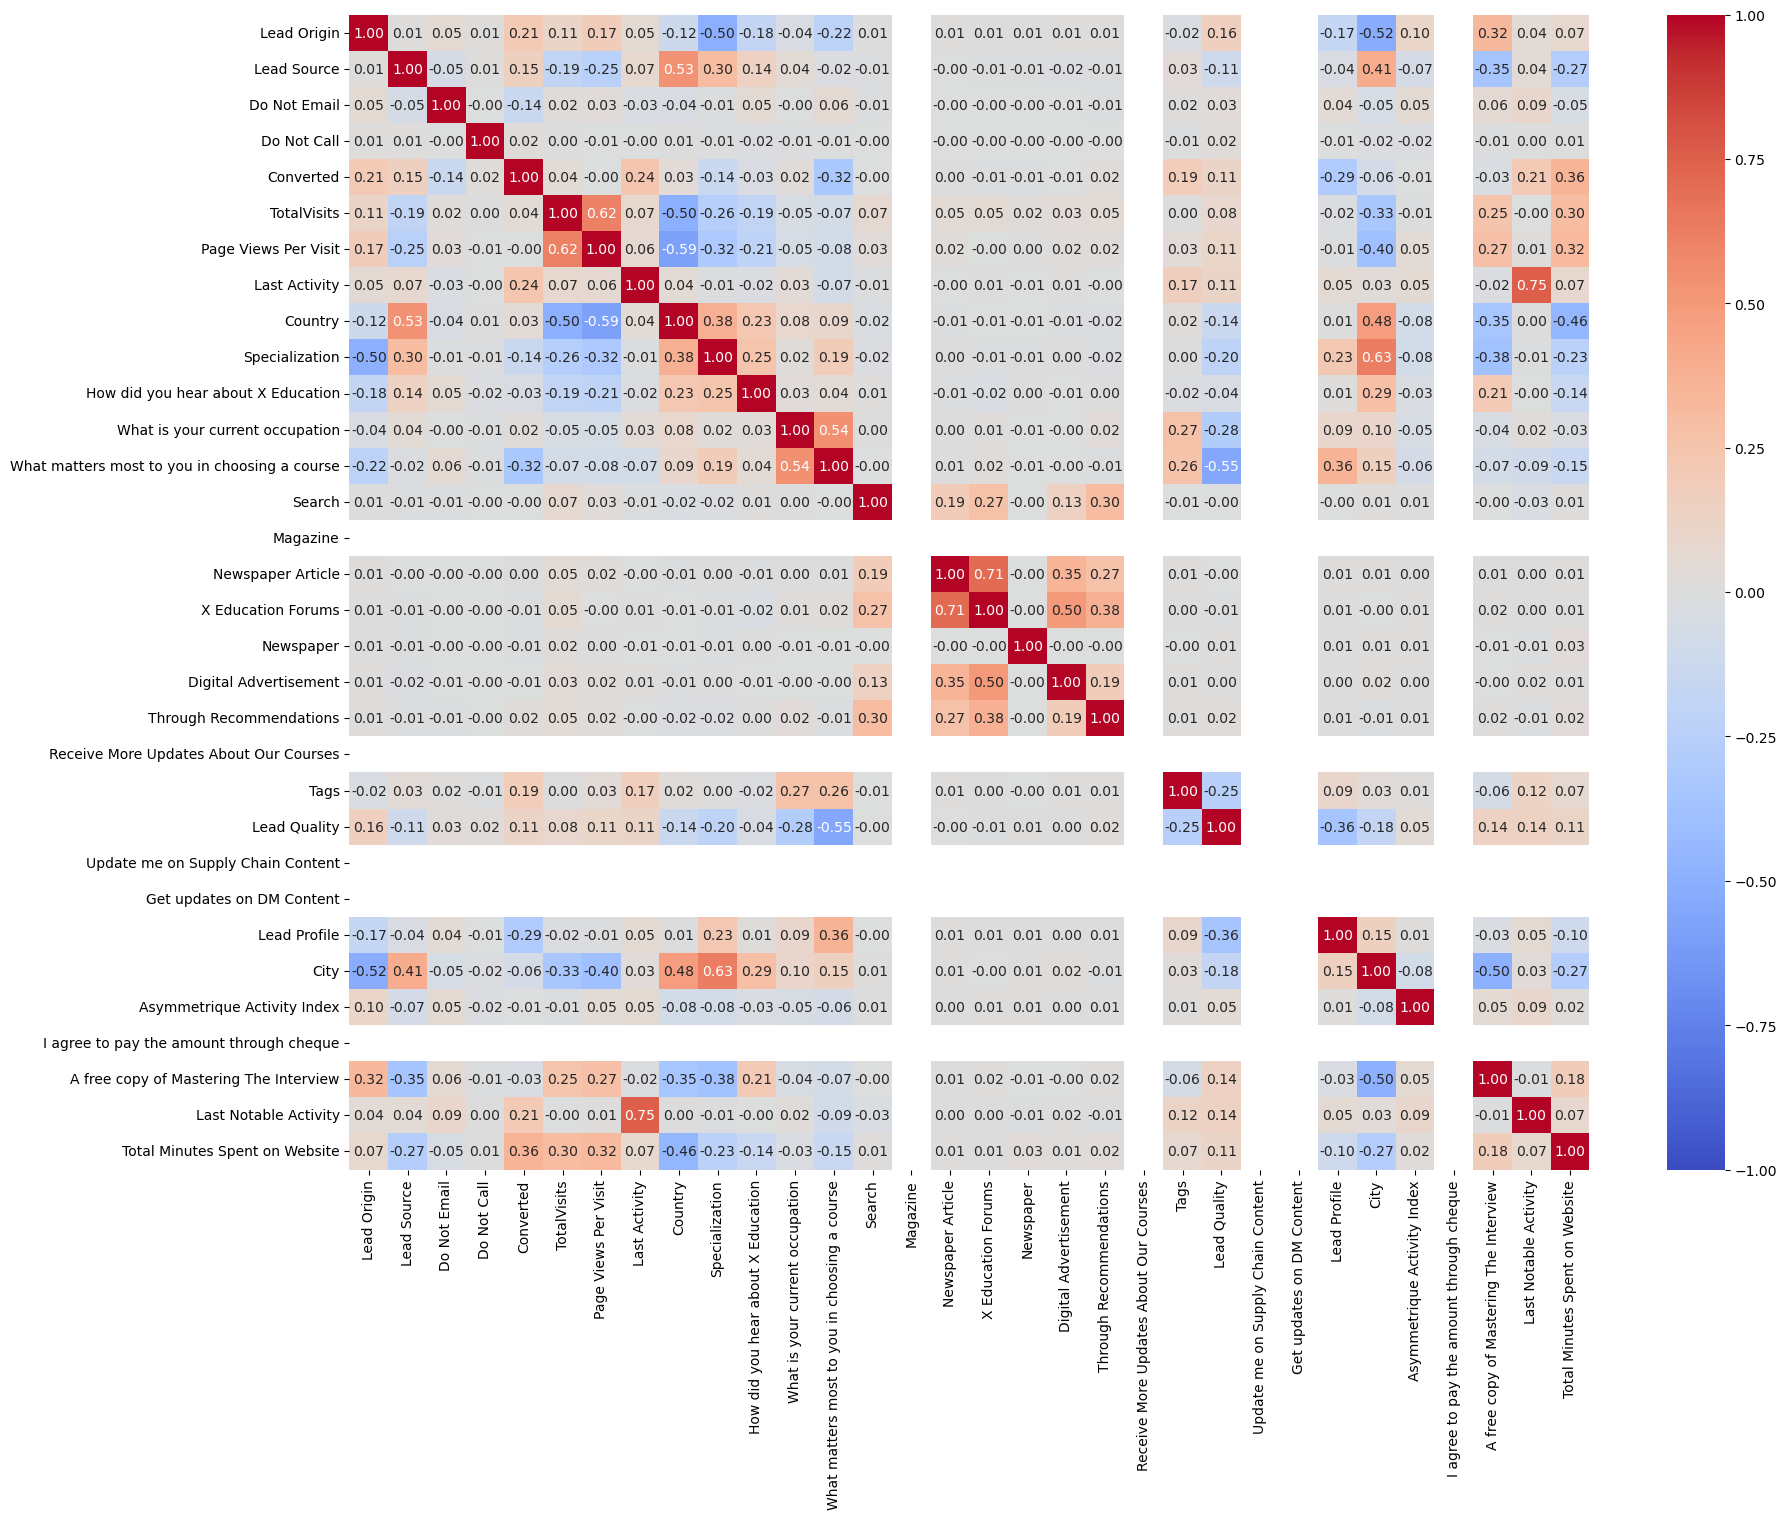

In [234]:
# Visual representaion of the Correlation between the target variable and the independent variables.
plt.figure(figsize=(20, 15))

# Create the heatmap
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

## Building Model

In [235]:
import statsmodels.api as sm

In [236]:
# Here we will add the constant values in our X_train as statsmodels does not provide it by default
X_train_sm = sm.add_constant(X_train)


In [237]:
# Here weill train the model and take a look at the statistical summary of our model
model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.1
Date:                Sun, 11 Aug 2024   Deviance:                       5206.2
Time:                        15:11:36   Pearson chi2:                 6.82e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.1226      0.415     -9.925      0.000      -4.937      -3.308
Lead Origin                                       0.5069      0.075      6.758      0.000       0.360       0.654
Lead Source                                       0.1213      0.015      8.184      0.000       0.092       0.150
Do Not Email                                     -1.6165      0.174     -9.298      0.000      -1.957      -1.276
Do Not Call                                      20.8180   2.06e+04      0.001      0.999   -4.03e+04    4.03e+04
TotalVisits                                       0.1161      0.046      2.545      0.011       0.027       0.205
Page Views Per Visit                             -0.2274      0.049     -4.603      0.000      -0.324      -0.131
Last Activity                                     0.0980      0.016      5.991      0.000       0.066       0.130
Country                                           0.0374      0.005      7.188      0.000       0.027       0.048
Specialization                                   -0.0216      0.008     -2.763      0.006      -0.037      -0.006
How did you hear about X Education                0.0340      0.022      1.552      0.121      -0.009       0.077
What is your current occupation                   0.7711      0.073     10.494      0.000       0.627       0.915
What matters most to you in choosing a course    -0.8640      0.040    -21.417      0.000      -0.943      -0.785
Search                                            0.0179      0.774      0.023      0.982      -1.499       1.535
Magazine                                       1.527e-09   1.76e-06      0.001      0.999   -3.46e-06    3.46e-06
Newspaper Article                                21.3509   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -43.8526   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -22.5355   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.2213      2.152     -0.103      0.918      -4.439       3.996
Through Recommendations                           2.1448      1.540      1.393      0.164      -0.873       5.162
Receive More Updates About Our Courses         2.096e-11   5.34e-08      0.000      1.000   -1.05e-07    1.05e-07
Tags                                              0.0798      0.006     13.717      0.000       0.068       0.091
Lead Quality                                     -0.2175      0.025     -8.822      0.000      -0.266      -0.169
Update me on Supply Chain Content               9.62e-15   1.06e-11      0.001      0.999   -2.07e-11    2.07e-11
Get u

### Here we can see that we have many variable with high p-value. So we will use the Recursive Feature Elimination to find the best 15 variables and then start the manual removal, if required.

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [238]:
# Running RFE with the output number of the variable equal to 15.
# But first we will need to create an instance of LR to use RFE later on it.

lm = LogisticRegression()
# lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [239]:
# This is the list of those variables that have been selected by the REF feature.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 4),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', False, 5),
 ('Specialization', False, 6),
 ('How did you hear about X Education', False, 12),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 11),
 ('Magazine', False, 15),
 ('Newspaper Article', False, 7),
 ('X Education Forums', False, 8),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 16),
 ('Tags', False, 2),
 ('Lead Quality', True, 1),
 ('Update me on Supply Chain Content', False, 17),
 ('Get updates on DM Content', False, 13),
 ('Lead Profile', True, 1),
 ('City', False, 10),
 ('Asymmetrique Activity Index', True, 1),
 ('I agree to pay the amount through cheque', False, 14),
 ('A free co

In [240]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Newspaper',
       'Through Recommendations', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'A free copy of Mastering The Interview',
       'Total Minutes Spent on Website'],
      dtype='object')

In [241]:
# This is the list of those variables that have not been selected by the REF feature.
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Country', 'Specialization',
       'How did you hear about X Education', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'Last Notable Activity'],
      dtype='object')

In [242]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe= X_train[col]
X_train_rfe.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Newspaper,Through Recommendations,Lead Quality,Lead Profile,Asymmetrique Activity Index,A free copy of Mastering The Interview,Total Minutes Spent on Website
391,0,6,0,0,-1.111184,9,4,0,0,0,0,5,3,0,-0.893221
4351,0,6,0,0,-1.111184,5,4,0,0,0,0,5,3,0,-0.893221
2661,2,10,0,0,-1.111184,12,6,0,0,0,3,3,3,0,-0.893221
8298,1,1,0,0,-0.629268,1,4,0,0,0,0,5,2,1,0.117334
6514,1,3,1,0,0.816478,12,4,0,0,0,4,5,3,0,-0.652352


In [243]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Lead Origin,Lead Source,Do Not Email,Do Not Call,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Newspaper,Through Recommendations,Lead Quality,Lead Profile,Asymmetrique Activity Index,A free copy of Mastering The Interview,Total Minutes Spent on Website
391,1.0,0,6,0,0,-1.111184,9,4,0,0,0,0,5,3,0,-0.893221
4351,1.0,0,6,0,0,-1.111184,5,4,0,0,0,0,5,3,0,-0.893221
2661,1.0,2,10,0,0,-1.111184,12,6,0,0,0,3,3,3,0,-0.893221
8298,1.0,1,1,0,0,-0.629268,1,4,0,0,0,0,5,2,1,0.117334
6514,1.0,1,3,1,0,0.816478,12,4,0,0,0,4,5,3,0,-0.652352


In [244]:
lm = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model

In [245]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6332
Model Family:                Gaussian   Df Model:                           15
Link Function:               Identity   Scale:                         0.14412
Method:                          IRLS   Log-Likelihood:                -2851.0
Date:                Sun, 11 Aug 2024   Deviance:                       912.55
Time:                        15:12:23   Pearson chi2:                     913.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4698
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1176      0.049      2.398      0.016       0.021       0.214
Lead Origin                                       0.0965      0.009     10.994      0.000       0.079       0.114
Lead Source                                       0.0250      0.002     13.888      0.000       0.022       0.029
Do Not Email                                     -0.1415      0.018     -7.889      0.000      -0.177      -0.106
Do Not Call                                       0.3838      0.269      1.428      0.153      -0.143       0.911
Page Views Per Visit                             -0.0471      0.005     -8.980      0.000      -0.057      -0.037
Last Activity                                     0.0247      0.001     18.382      0.000       0.022       0.027
What is your current occupation                   0.1233      0.008     14.644      0.000       0.107       0.140
What matters most to you in choosing a course    -0.1219      0.005    -23.855      0.000      -0.132      -0.112
Newspaper                                        -0.5991      0.380     -1.576      0.115      -1.344       0.146
Through Recommendations                           0.1201      0.155      0.773      0.439      -0.184       0.425
Lead Quality                                     -0.0399      0.003    -11.790      0.000      -0.047      -0.033
Lead Profile                                     -0.0884      0.005    -16.306      0.000      -0.099      -0.078
Asymmetrique Activity Index                      -0.0218      0.007     -2.912      0.004      -0.036      -0.007
A free copy of Mastering The Interview           -0.0514      0.012     -4.368      0.000      -0.074      -0.028
Total Minutes Spent on Website                    0.1766      0.005     33.709      0.000       0.166       0.187
=================================================================================================================
"""

In [246]:
# We will remove those variables having high P-value
X_train_new = X_train_rfe.drop(["Do Not Call","Newspaper","Through Recommendations"], axis = 1)

#### Rebuilding a new model without these variables having high p-value

In [247]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [248]:
lm = sm.GLM(y_train,X_train_lm).fit()   # Running the linear model

In [249]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6335
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                         0.14417
Method:                          IRLS   Log-Likelihood:                -2853.5
Date:                Sun, 11 Aug 2024   Deviance:                       913.29
Time:                        15:12:30   Pearson chi2:                     913.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4693
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1172      0.049      2.392      0.017       0.021       0.213
Lead Origin                                       0.0965      0.009     10.993      0.000       0.079       0.114
Lead Source                                       0.0251      0.002     13.913      0.000       0.022       0.029
Do Not Email                                     -0.1416      0.018     -7.894      0.000      -0.177      -0.106
Page Views Per Visit                             -0.0471      0.005     -8.983      0.000      -0.057      -0.037
Last Activity                                     0.0247      0.001     18.391      0.000       0.022       0.027
What is your current occupation                   0.1235      0.008     14.689      0.000       0.107       0.140
What matters most to you in choosing a course    -0.1219      0.005    -23.873      0.000      -0.132      -0.112
Lead Quality                                     -0.0399      0.003    -11.782      0.000      -0.046      -0.033
Lead Profile                                     -0.0884      0.005    -16.317      0.000      -0.099      -0.078
Asymmetrique Activity Index                      -0.0221      0.007     -2.956      0.003      -0.037      -0.007
A free copy of Mastering The Interview           -0.0511      0.012     -4.344      0.000      -0.074      -0.028
Total Minutes Spent on Website                    0.1765      0.005     33.707      0.000       0.166       0.187
=================================================================================================================
"""

In [250]:
# Now we can remove the constant from the model having very high p-value
X_train_nocons = X_train_new.drop(['const'], axis=1)

In [251]:
# Calculate the VIFs for the new model to determine the multicoliniarity so that we can remove any variable which is redundant in this model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nocons
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation,28.78
8,Lead Profile,18.70
9,Asymmetrique Activity Index,13.48
4,Last Activity,5.79
1,Lead Source,3.65
6,What matters most to you in choosing a course,2.81
0,Lead Origin,2.80
7,Lead Quality,2.57
10,A free copy of Mastering The Interview,1.94
3,Page Views Per Visit,1.21


In [252]:
# Here we can see that two variables have very high VIF. We will remove one of the fist and measure the change in the VIF value of others
X_train_new = X_train_new.drop(['What is your current occupation',"Lead Profile","Asymmetrique Activity Index"], axis=1)

In [253]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6338
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                         0.15684
Method:                          IRLS   Log-Likelihood:                -3122.5
Date:                Sun, 11 Aug 2024   Deviance:                       994.06
Time:                        15:12:33   Pearson chi2:                     994.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3942
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1567      0.017      9.071      0.000       0.123       0.191
Lead Origin                                       0.1206      0.009     13.342      0.000       0.103       0.138
Lead Source                                       0.0284      0.002     15.176      0.000       0.025       0.032
Do Not Email                                     -0.1656      0.019     -8.869      0.000      -0.202      -0.129
Page Views Per Visit                             -0.0533      0.005     -9.757      0.000      -0.064      -0.043
Last Activity                                     0.0234      0.001     16.937      0.000       0.021       0.026
What matters most to you in choosing a course    -0.0973      0.004    -21.683      0.000      -0.106      -0.089
Lead Quality                                     -0.0264      0.003     -7.670      0.000      -0.033      -0.020
A free copy of Mastering The Interview           -0.0590      0.012     -4.811      0.000      -0.083      -0.035
Total Minutes Spent on Website                    0.1900      0.005     35.001      0.000       0.179       0.201
=================================================================================================================
"""

In [254]:
X_train_nocons = X_train_new.drop(['const'], axis=1)

In [255]:
X_train_nocons.head()

,Lead Origin,Lead Source,Do Not Email,Page Views Per Visit,Last Activity,What matters most to you in choosing a course,Lead Quality,A free copy of Mastering The Interview,Total Minutes Spent on Website
391,0,6,0,-1.111184,9,0,0,0,-0.893221
4351,0,6,0,-1.111184,5,0,0,0,-0.893221
2661,2,10,0,-1.111184,12,0,3,0,-0.893221
8298,1,1,0,-0.629268,1,0,0,1,0.117334
6514,1,3,1,0.816478,12,0,4,0,-0.652352


In [256]:
# Calculate the VIFs for the new model to determine the multicoliniarity so that we can remove any variable which is redundant in this model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nocons
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity,4.01
1,Lead Source,2.93
0,Lead Origin,2.58
6,Lead Quality,2.18
7,A free copy of Mastering The Interview,1.84
5,What matters most to you in choosing a course,1.71
3,Page Views Per Visit,1.20
8,Total Minutes Spent on Website,1.19
2,Do Not Email,1.10


In [257]:
# Getting the predicted values on the train set
y_train_pred = lm.predict(X_train_lm)
y_train_pred[:5]

391     0.427463
4351    0.333762
2661    0.773352
8298    0.325961
6514    0.204944
dtype: float64

In [258]:
# We will need to rehsape the results so that we can convert it into dataframe later 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.42746311,  0.33376177,  0.77335174,  0.32596135,  0.20494381,
        0.57270074,  0.42746311, -0.1746143 ,  0.32401255,  0.13553246])

In [259]:
# Now we will create a dataframe to show distinguish between the predicted and actual values.
y_train_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_df['Lead_ID'] = y_train.index
y_train_df.head()

,Converted,Converted_Prob,Lead_ID
0,0,0.427463,391
1,0,0.333762,4351
2,1,0.773352,2661
3,0,0.325961,8298
4,0,0.204944,6514


In [260]:
# Now we will Create a new column 'predicted' with 1 if converted_Prob > 0.5 else 0
y_train_df['predicted'] = y_train_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_df.head()

,Converted,Converted_Prob,Lead_ID,predicted
0,0,0.427463,391,0
1,0,0.333762,4351,0
2,1,0.773352,2661,1
3,0,0.325961,8298,0
4,0,0.204944,6514,0


## Evaluation Metrics

In [261]:
# Confusion matrix 
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_df.Converted, y_train_df.predicted)
print(confusion)

[[3430  516]
 [ 879 1523]]


In [262]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_df.Converted, y_train_df.predicted))

0.7802457466918714


In [263]:
                            # Actual/Predicted        not_converted    converted
                                    # not_converted        TN            FP
                                    # converted            FN            TP  

In [264]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our logistic regression model
# Earlier, we had overall accuray of 78% but sesitivity shows how much accurately we have identified the conversion of leads.
TP / float(TP+FN)

0.6340549542048293

In [266]:
# Let us calculate specificity
# We can see that we have very high specificity which is a good sign for a predicitve model.
TN / float(TN+FP)

0.8692346680182463

In [267]:
# Calculate false postive rate - predicting conversion when customer had not converted
print(FP/ float(TN+FP))

# False Positive Rate = 1-specificity

0.13076533198175366


In [268]:
# positive predictive value : How many times were you correcrt in predicting the conversion rate.
print (TP / float(TP+FP))

0.7469347719470328


In [269]:
# Negative predictive value: How many times were you correcrt in predicting the non-conversion rate.
print (TN / float(TN+ FN))

0.7960083546066373


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [270]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [271]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_df.Converted, y_train_df.Converted_Prob, drop_intermediate = False )

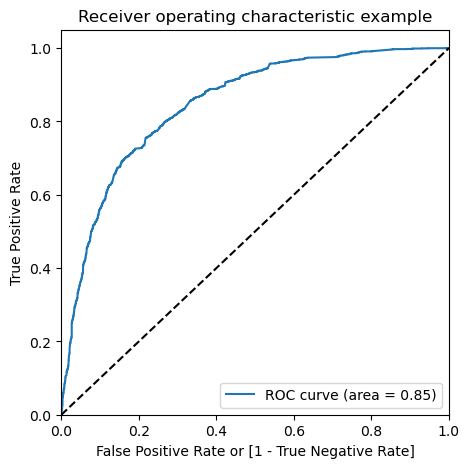

In [272]:
draw_roc(y_train_df.Converted, y_train_df.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [273]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_df.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.427463,391,0,1,1,1,1,1,0,0,0,0,0
1,0,0.333762,4351,0,1,1,1,1,0,0,0,0,0,0
2,1,0.773352,2661,1,1,1,1,1,1,1,1,1,0,0
3,0,0.325961,8298,0,1,1,1,1,0,0,0,0,0,0
4,0,0.204944,6514,0,1,1,1,0,0,0,0,0,0,0


In [274]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.Converted, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.447700  0.997086  0.113279
0.1   0.1  0.531821  0.983347  0.256969
0.2   0.2  0.639729  0.958368  0.445768
0.3   0.3  0.720542  0.884679  0.620628
0.4   0.4  0.764650  0.771440  0.760517
0.5   0.5  0.780246  0.634055  0.869235
0.6   0.6  0.763390  0.506661  0.919665
0.7   0.7  0.723535  0.341382  0.956158
0.8   0.8  0.678324  0.185262  0.978459
0.9   0.9  0.646188  0.077019  0.992651


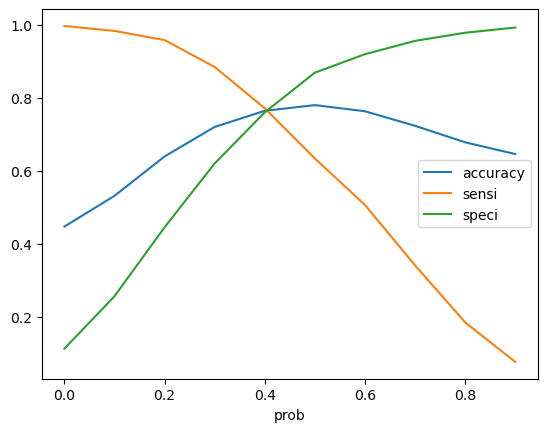

In [275]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [276]:
y_train_df['final_predicted'] = y_train_df.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_df.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.427463,391,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.333762,4351,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.773352,2661,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.325961,8298,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.204944,6514,0,1,1,1,0,0,0,0,0,0,0,0


In [277]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_df.Converted, y_train_df.final_predicted)

0.7646502835538752

In [278]:
confusion2 = metrics.confusion_matrix(y_train_df.Converted, y_train_df.final_predicted)
confusion2

array([[3001,  945],
       [ 549, 1853]], dtype=int64)

In [279]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [280]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7714404662781016

In [281]:
# Let us calculate specificity
TN / float(TN+FP)

0.7605169792194627

In [282]:

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23948302078053726


In [283]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6622587562544675


In [284]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8453521126760564


## Precision and Recall

In [285]:
confusion = metrics.confusion_matrix(y_train_df.Converted, y_train_df.final_predicted )
confusion

array([[3001,  945],
       [ 549, 1853]], dtype=int64)

##### Precision
TP / TP + FP

In [286]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6622587562544675

In [287]:
##### Recall
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7714404662781016

In [288]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_df.Converted, y_train_df.Converted_Prob)

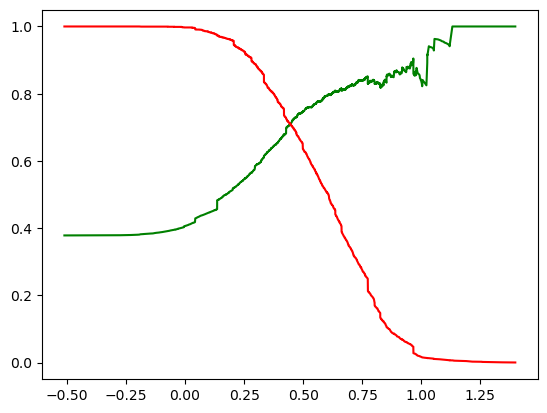

In [289]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [290]:
var = ["TotalVisits","Page Views Per Visit","Total Minutes Spent on Website"]
X_test[var] = scaler.transform(X_test[var])
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Total Minutes Spent on Website
5390,2,10,0,0,-0.969300,-1.111184,12,36,7,8,4,0,0,0,0,0,0,0,0,0,20,1,0,0,3,4,3,0,0,12,-0.893221
8245,0,6,0,0,-0.969300,-1.111184,5,36,18,8,5,3,0,0,0,0,0,0,0,0,18,0,0,0,5,6,1,0,0,4,-0.893221
6740,1,1,0,0,0.442095,1.298393,12,12,4,8,4,0,0,0,0,0,0,0,0,0,18,0,0,0,5,0,3,0,1,12,1.750863
8372,1,1,0,0,-0.404742,-0.147353,8,12,8,8,6,0,0,0,0,0,0,0,0,0,20,3,0,0,5,0,2,0,1,8,0.504914
5356,1,1,0,0,0.442095,-0.629268,3,35,9,8,4,0,0,0,0,0,0,0,0,0,0,5,0,0,5,0,3,0,1,2,1.726776


In [291]:
X_test =X_test[X_train_nocons.columns]

In [292]:
X_test_sm = sm.add_constant(X_test)

In [293]:
X_test_sm.head()

,const,Lead Origin,Lead Source,Do Not Email,Page Views Per Visit,Last Activity,What matters most to you in choosing a course,Lead Quality,A free copy of Mastering The Interview,Total Minutes Spent on Website
5390,1.0,2,10,0,-1.111184,12,0,1,0,-0.893221
8245,1.0,0,6,0,-1.111184,5,3,0,0,-0.893221
6740,1.0,1,1,0,1.298393,12,0,0,1,1.750863
8372,1.0,1,1,0,-0.147353,8,0,3,1,0.504914
5356,1.0,1,1,0,-0.629268,3,0,5,1,1.726776


In [294]:

# X_test_sm  = X_test_sm[["Last Activity","Lead Source","Page Views Per Visit","Lead Origin","Total Minutes Spent on Website",
#                         "What matters most to you in choosing a course","Do Not Email","Lead Quality"]]

In [295]:
y_test_pred = lm.predict(X_test_sm)

In [296]:
y_test_pred[:10]

5390    0.826176
8245    0.041831
6740    0.791239
8372    0.458650
5356    0.546533
6263    0.286474
2330    0.135532
1988    0.095107
6092    0.787720
7668   -0.132607
dtype: float64

In [297]:

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [298]:

# Let's see the head
y_pred_1.head()

,0
5390,0.826176
8245,0.041831
6740,0.791239
8372,0.458650
5356,0.546533


In [299]:

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [300]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [301]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [302]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [303]:
y_pred_final.head()

,Converted,Lead_ID,0
0,1,5390,0.826176
1,0,8245,0.041831
2,1,6740,0.791239
3,1,8372,0.458650
4,0,5356,0.546533


In [304]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [305]:
# Rearranging the columns
y_pred_final.columns = ['Converted','Lead_ID','Converted_Prob']

In [306]:
y_pred_final

,Converted,Lead_ID,Converted_Prob
0,1,5390,0.826176
1,0,8245,0.041831
2,1,6740,0.791239
3,1,8372,0.458650
4,0,5356,0.546533
...,...,...,...
2716,1,7791,0.347580
2717,0,2351,0.593146
2718,1,3270,0.831665
2719,0,4729,0.096329


In [307]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [308]:
y_pred_final.head()

,Converted,Lead_ID,Converted_Prob,final_predicted
0,1,5390,0.826176,1
1,0,8245,0.041831,0
2,1,6740,0.791239,1
3,1,8372,0.458650,1
4,0,5356,0.546533,1


In [309]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7666299154722529

In [310]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1347,  343],
       [ 292,  739]], dtype=int64)

In [311]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [312]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7167798254122212

In [313]:
# Let us calculate specificity
TN / float(TN+FP)

0.7970414201183432

### In the overall analysis, we can see that we have been able to build a very decent model on the basis of the values given by different evaluation metrics. Our model seems to predict most of the values and this will help us to increase the proportion of leads turned into permanent clients.